# Henry Ezeanowi
# 8900446
# Group 2
# Assignment 2 - Project

### Using Random forest to Identifying factors related to mental health and their possible impact on unemployment.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read the data

In [41]:
df = pd.read_csv('mental_illness_survey.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Response,Response,Response,Open-Ended Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,6.630447e+09,168522804.0,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,NaN,NaN,NaN,NaN,06f645d7ea5af372d50a62bd17,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,168522804.0,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,NaN,NaN,NaN,NaN,abca2776418ff1fe24bb85e21f,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,168522804.0,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,NaN,NaN,NaN,NaN,3800088cf4e55278b38bbe67f3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,168522804.0,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,NaN,NaN,NaN,NaN,84585803a3cec189f89fe43d44,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,6.630290e+09,168522804.0,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,NaN,NaN,NaN,NaN,4b4faaaa7eaff01549233044bd,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
6,6.630246e+09,168522804.0,01/15/2018 12:40:03 AM,01/15/2018 12:42:26 AM,NaN,NaN,NaN,NaN,4cc5941a4f2572aa7c4a708008,No,High School or GED,Yes,No,0,Yes,No,Yes,Yes,No,0,0,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet
7,6.630236e+09,168522804.0,01/15/2018 12:30:16 AM,01/15/2018 12:31:51 AM,NaN,NaN,NaN,NaN,c06b5c9b4f73dccbdf2af2f67f,No,Some Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,1,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
8,6.630216e+09,168522804.0,01/15/2018 12:08:46 AM,01/15/2018 12:11:24 AM,NaN,NaN,NaN,NaN,40ca6ac2f0a327e96d797478a4,Yes,Some Undergraduate,Yes,No,0,Yes,No,Yes,Yes,No,0,11,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,Compulsive behavior,Tiredness,18-29,Male,"$100,000-$124,999",Middle Atlantic,Windows Desktop / Laptop
9,6.630198e+09,168522804.0,01/14/2018 11:50:35 PM,01/14/2018 11:52:27

In [42]:
df.shape

(335, 40)

Summary of the data

In [43]:
print(df.info())
# df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

Remove columns not required for analysis

In [44]:
columns_to_remove = list(range(0, 9))
df.drop(df.columns[columns_to_remove], axis=1, inplace=True)

Remove the first row

In [45]:
df = df.iloc[1:]

In [46]:
df.head(5)

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
1,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Substitute 'Yes' with 1 and 'No' with 0, and replace any missing values with 0.

In [47]:
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)

Changing some column names and converting them numeric

In [48]:
df.rename(columns={'I identify as having a mental illness': 'MentallyIll', 'I am unemployed': 'Unemployed', 'Annual income (including any social welfare programs) in USD':'Income'}, inplace=True)

# converting columns to numeric
mental_illness = pd.to_numeric(df.MentallyIll)
unemployed = pd.to_numeric(df.Unemployed)
income = pd.to_numeric(df.Income)

In [49]:
df.head(5)

,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
1,0,High School or GED,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,0,Panic attacks,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,1,Some Phd,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,Lack of concentration,Anxiety,Depression,0,0,Panic attacks,0,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,0,Completed Undergraduate,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,0,Some Undergraduate,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,1,Completed Undergraduate,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Summary statistics for the 'income' column

In [50]:
print('Income description:')
print(income.describe())

Income description:
count    334.000000
mean      37.425150
std       30.651564
min        0.000000
25%       12.000000
50%       30.000000
75%       55.000000
max      100.000000
Name: Income, dtype: float64


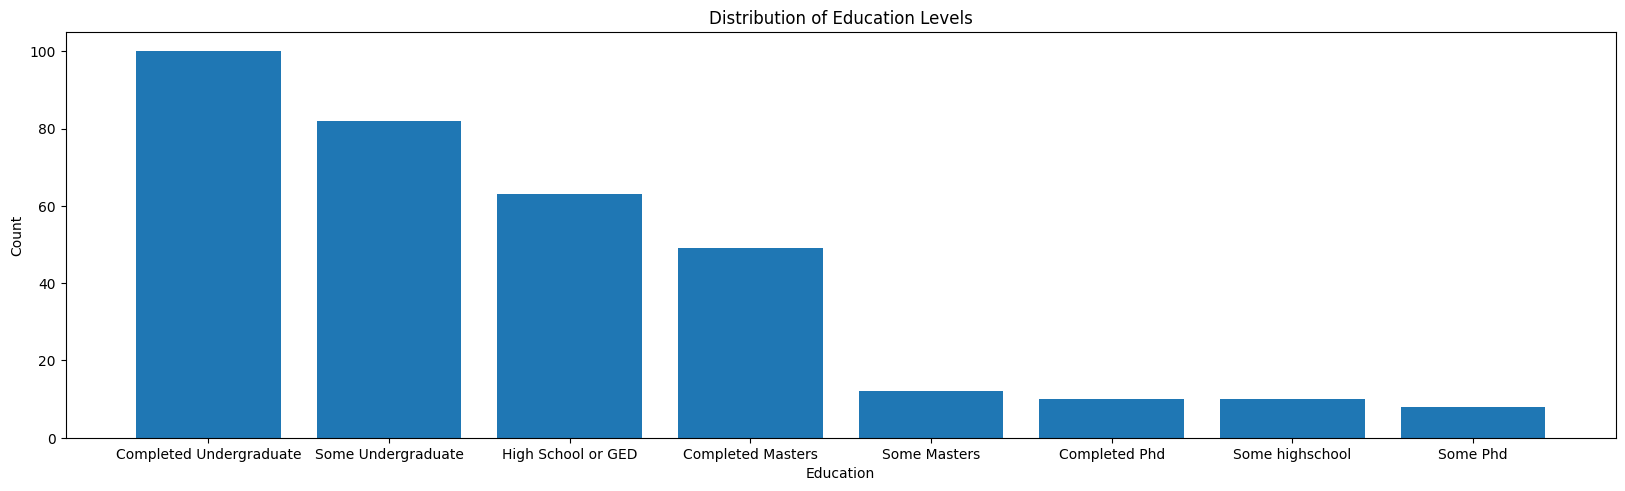

In [51]:
# Set the figure size
figure_dimensions = (20, 5.27)
fig, ax = plt.subplots(figsize=figure_dimensions)

# Create a count plot using Matplotlib for the 'Education' column
ax.bar(df.Education.value_counts().index, df.Education.value_counts())

# Customize the plot
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Distribution of Education Levels')


# Show the plot
plt.show()

Convert specific columns to NumPy structured arrays

In [52]:
education_array = df['Education'].to_frame().to_records()
mental_illness_array = df['MentallyIll'].to_frame().to_records()
income_array = df['Income'].to_frame().to_records()
unemployed_array = df['Unemployed'].to_frame().to_records()
gender_array = df['Gender'].to_frame().to_records()
age_array = df['Age'].to_frame().to_records()

Categorizing into different age range and collecting income and unemployed status from separate arrays.

In [53]:
sixty, fifty, thirty, twenty = [], [], [], []

for record in age_array:
    index = record[0]
    age_category = record[1]
    income_value = income_array[index - 1][1]
    unemployed_value = unemployed_array[index - 1][1]
    
    if age_category == '> 60':
        sixty.append((index, income_value, unemployed_value))
    elif age_category == '45-60':
        fifty.append((index, income_value, unemployed_value))
    elif age_category == '30-44':
        thirty.append((index, income_value, unemployed_value))
    elif age_category == '18-29':
        twenty.append((index, income_value, unemployed_value))

Average unemployment rates for each age category

In [54]:
age_categories = [sixty, fifty, thirty, twenty]
age_category_titles = ['Sixties', 'Fifties', 'Thirties', 'Twenties']

for index, age_group in enumerate(age_categories):
    # Sort by income
    sorted_incomes = sorted([x[1] for x in age_group])
    unemployment_rates = [x[2] for x in age_group]

    # Convert income to integers
    integer_incomes = [int(i) for i in sorted_incomes]

    avg_unemployment_rate = sum(unemployment_rates) / len(unemployment_rates)
    print(age_category_titles[index], '-- Average Unemployment Rate:', avg_unemployment_rate)

Sixties -- Average Unemployment Rate: 0.325
Fifties -- Average Unemployment Rate: 0.18181818181818182
Thirties -- Average Unemployment Rate: 0.2524271844660194
Twenties -- Average Unemployment Rate: 0.3076923076923077


Categorizing into different education level groups, mental illness status, income, unemployment status, gender, and age for that individual from their respective arrays.

In [55]:
# Separate and regroup data based on education level
completed_masters = []
completed_undergrad = []
high_school = []
some_Phd = []
completed_Phd = []
some_highschool = []
some_undergrad = []
some_masters = []

for record in education_array:
    index = record[0]
    education_level = record[1]
    mental_status = mental_illness_array[index - 1][1]
    income_value = income_array[index - 1][1]
    unemployed_value = unemployed_array[index - 1][1]
    gender_value = gender_array[index - 1][1]
    age_value = age_array[index - 1][1]

    if education_level == 'Completed Masters':
        completed_masters.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'Completed Undergraduate':
        completed_undergrad.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'High School or GED':
        high_school.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'Some Phd':
        some_Phd.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'Completed Phd':
        completed_Phd.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'Some highschool':
        some_highschool.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    elif education_level == 'Some Undergraduate':
        some_undergrad.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))
    else:
        some_masters.append((index, mental_status, income_value, unemployed_value, gender_value, age_value))

Scatter plots for the different education levels

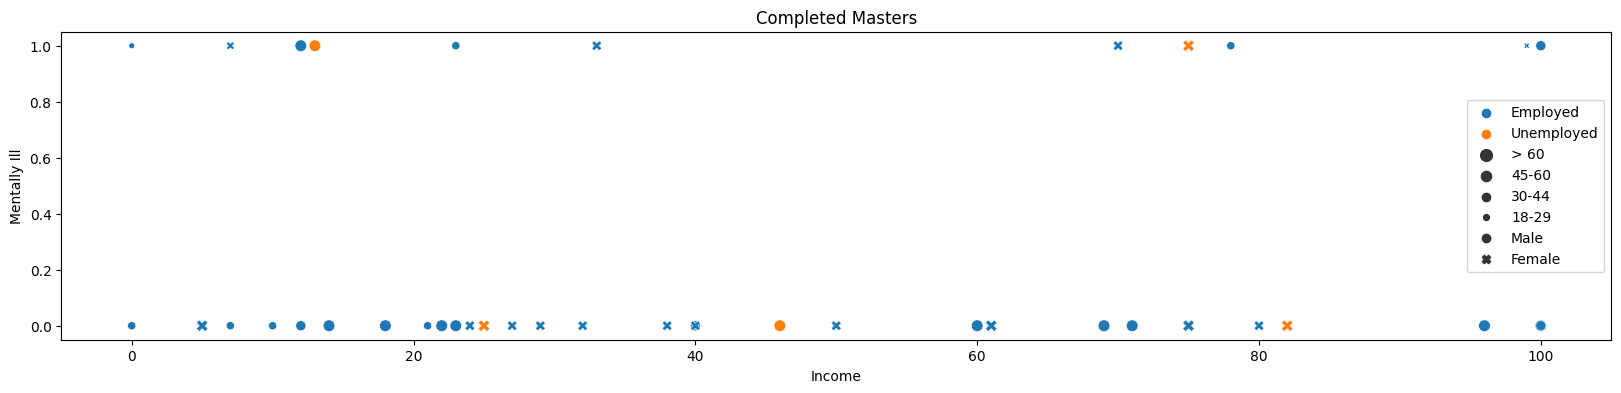

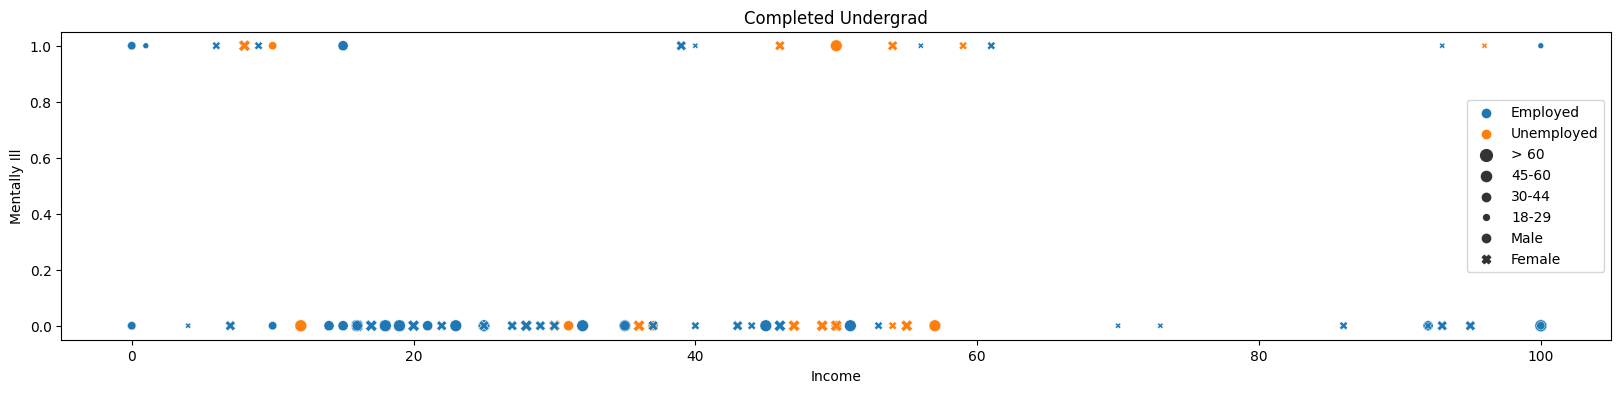

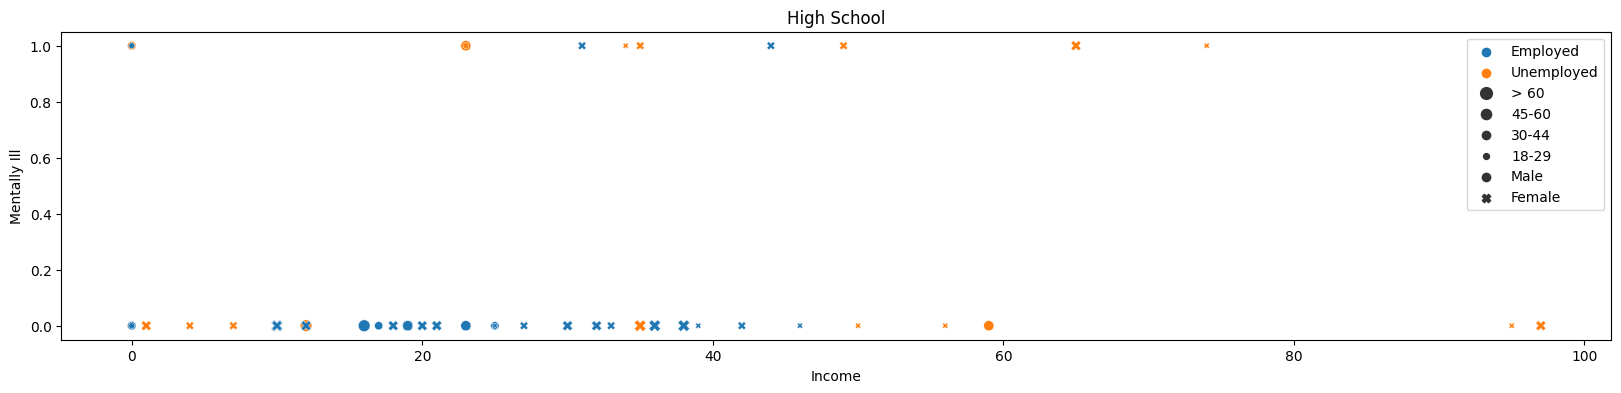

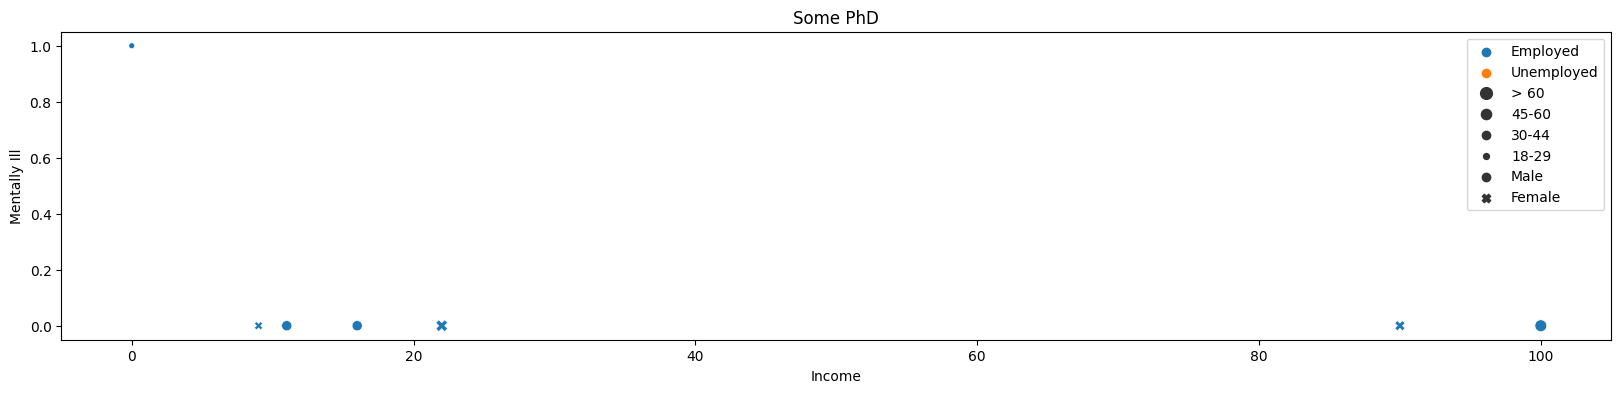

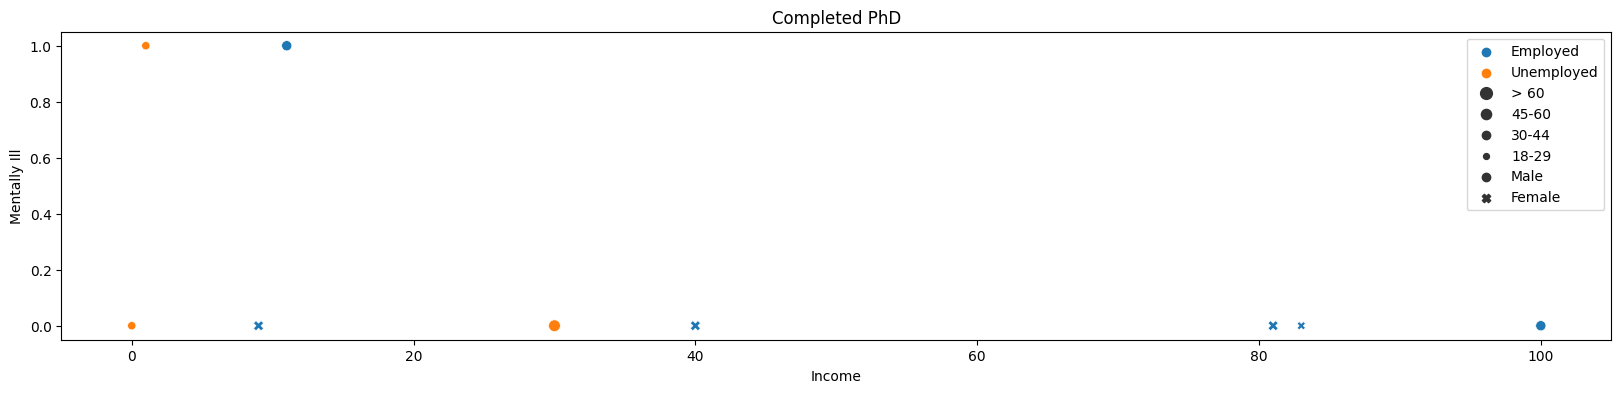

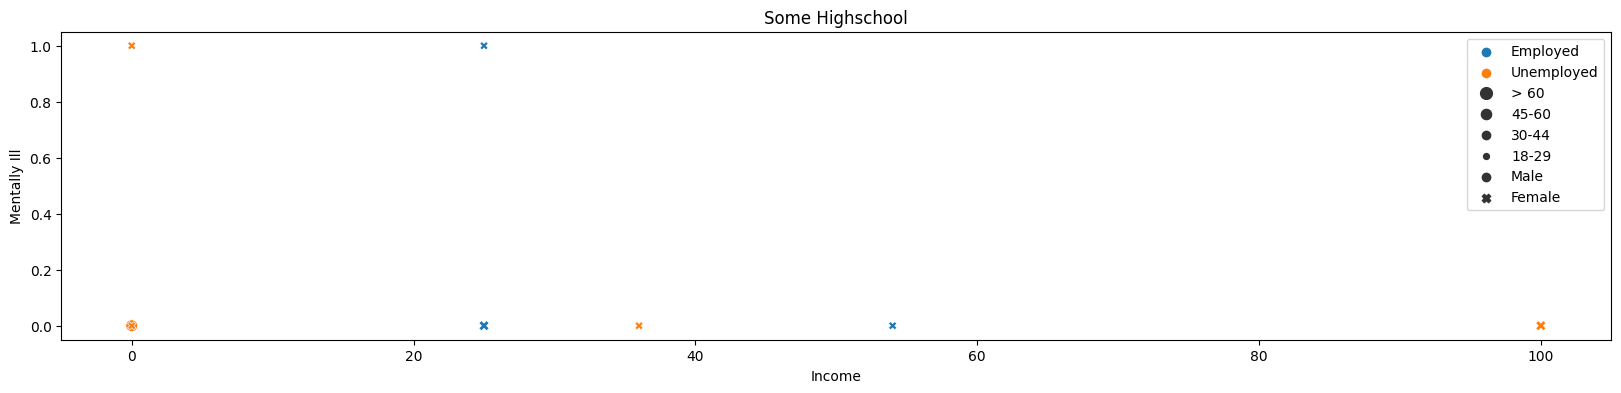

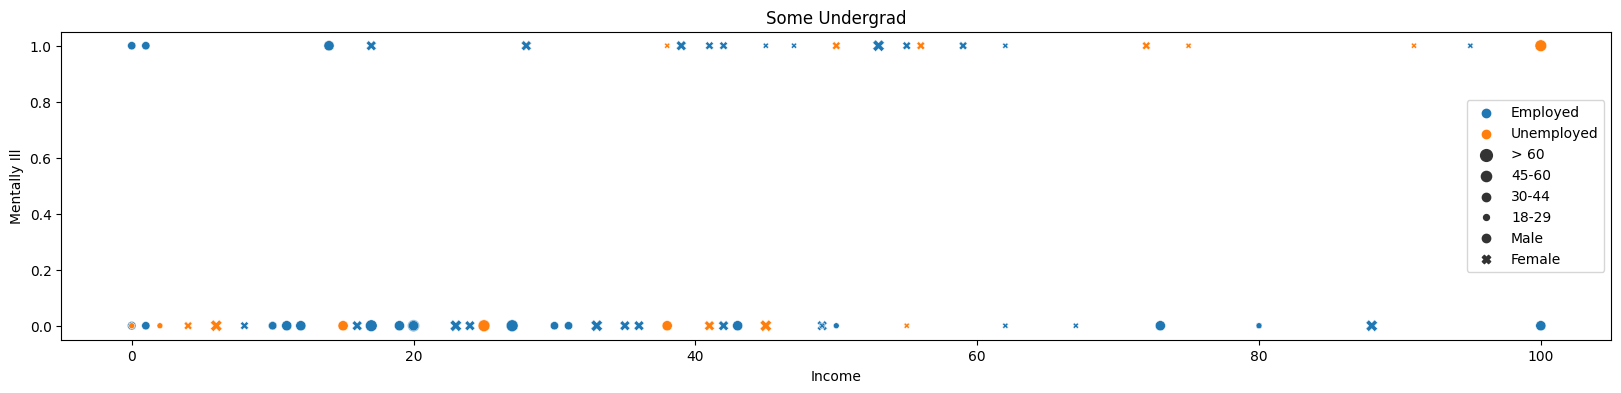

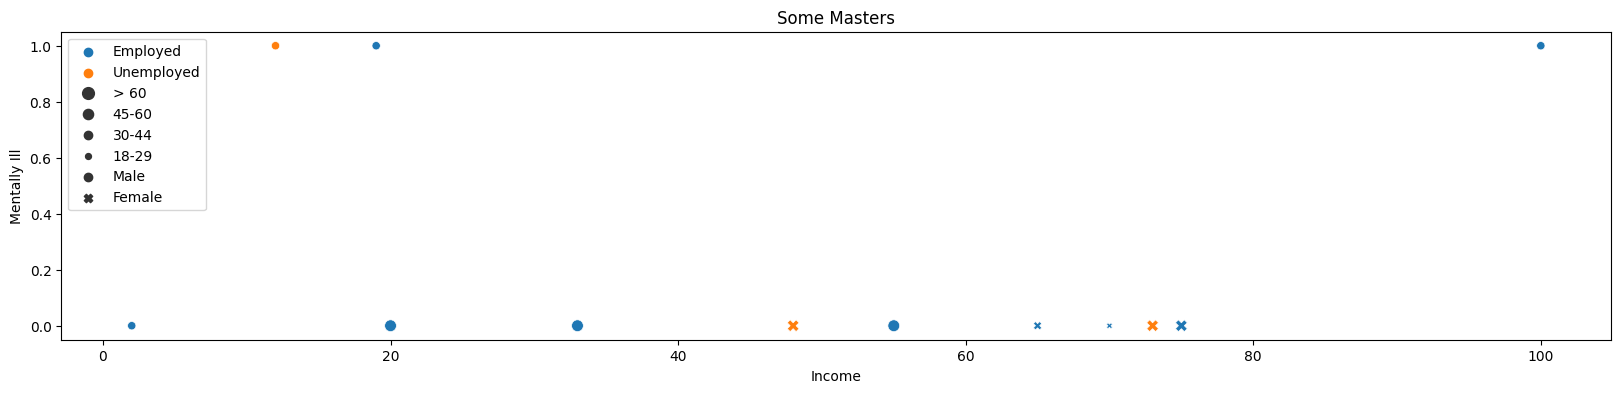

In [56]:
# Plot data with different graphs for different education levels
data_lists = [completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters]
education_titles = ['Completed Masters', 'Completed Undergrad', 'High School', 'Some PhD', 'Completed PhD', 'Some Highschool', 'Some Undergrad', 'Some Masters']

for index, data_group in enumerate(data_lists):
    # Sort data by income
    sorted_incomes = sorted([x[2] for x in data_group])
    mental_illness = [x[1] for x in data_group]
    employment_status = [x[3] for x in data_group]
    gender = [x[4] for x in data_group]
    ages = [x[5] for x in data_group]

    # Convert income to whole numbers
    integer_incomes = [int(i) for i in sorted_incomes]

    # Convert binary employment status to text labels
    employment_labels = ['Unemployed' if status == 1 else 'Employed' for status in employment_status]

    # Set plot dimensions
    a4_dims = (20, 4)
    fig, ax = plt.subplots(figsize=a4_dims)

    # Create scatter plot
    scatter_plot = sns.scatterplot(x=integer_incomes, y=mental_illness,
                                    hue=employment_labels, hue_order=['Employed', 'Unemployed'],
                                    style=gender,
                                    size=ages, size_order=['> 60', '45-60', '30-44', '18-29'])
    
    # Set plot labels and title
    ax.set(xlabel='Income', ylabel='Mentally Ill')
    plt.title(education_titles[index])

Transforming Categorical data to numerical data

In [57]:
# Create a new DataFrame for machine learning analysis
df_2 = df

# Remove the last 3 irrelevant columns
df_2 = df_2.iloc[:, :-3]

In [58]:

# Replace s with binary representations
df_2 = df_2.replace(['Lack of concentration','Anxiety', 'Depression', 
                                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                                   'Mood swings', 'Tiredness'], 1)

# Replace gender: 'Male' with 1, 'Female' with 0
df_2 = df_2.replace(to_replace=['Female', 'Male'], value=[0, 1])

# Replace age categories with median age values
df_2 = df_2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])

# Replace education levels with numerical ranking (0 to 7)
df_2 = df_2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters', 
                                              'Completed Undergraduate', 'Some Undergraduate', 
                                              'High School or GED', 'Some highschool'], value=[7, 6, 5, 4, 3, 2, 1, 0])


In [59]:
df_2.head(10)

,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender
1,0,1,0,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,37,1
2,1,6,1,0,0,1,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,23,1
3,0,3,1,0,0,1,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,37,1
4,0,2,1,0,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,37,1
5,1,3,1,1,35,1,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,37,1
6,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,37,1
7,0,2,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23,1
8,1,2,1,0,0,1,0,1,1,0,0,11,0,1,0,0,0,0,1,1,1,0,0,1,1,1,23,1
9,0,3,1,0,0,1,0,1,0,0,0,73,0,1,0,0,0,0,1,1,1,0,0,0,0,1,37,1
10,1,4,1,0,0,1,0,1,0,0,0,12,0,1,0,0,0,0,0,1,1,0,0,0,0,1,37,1


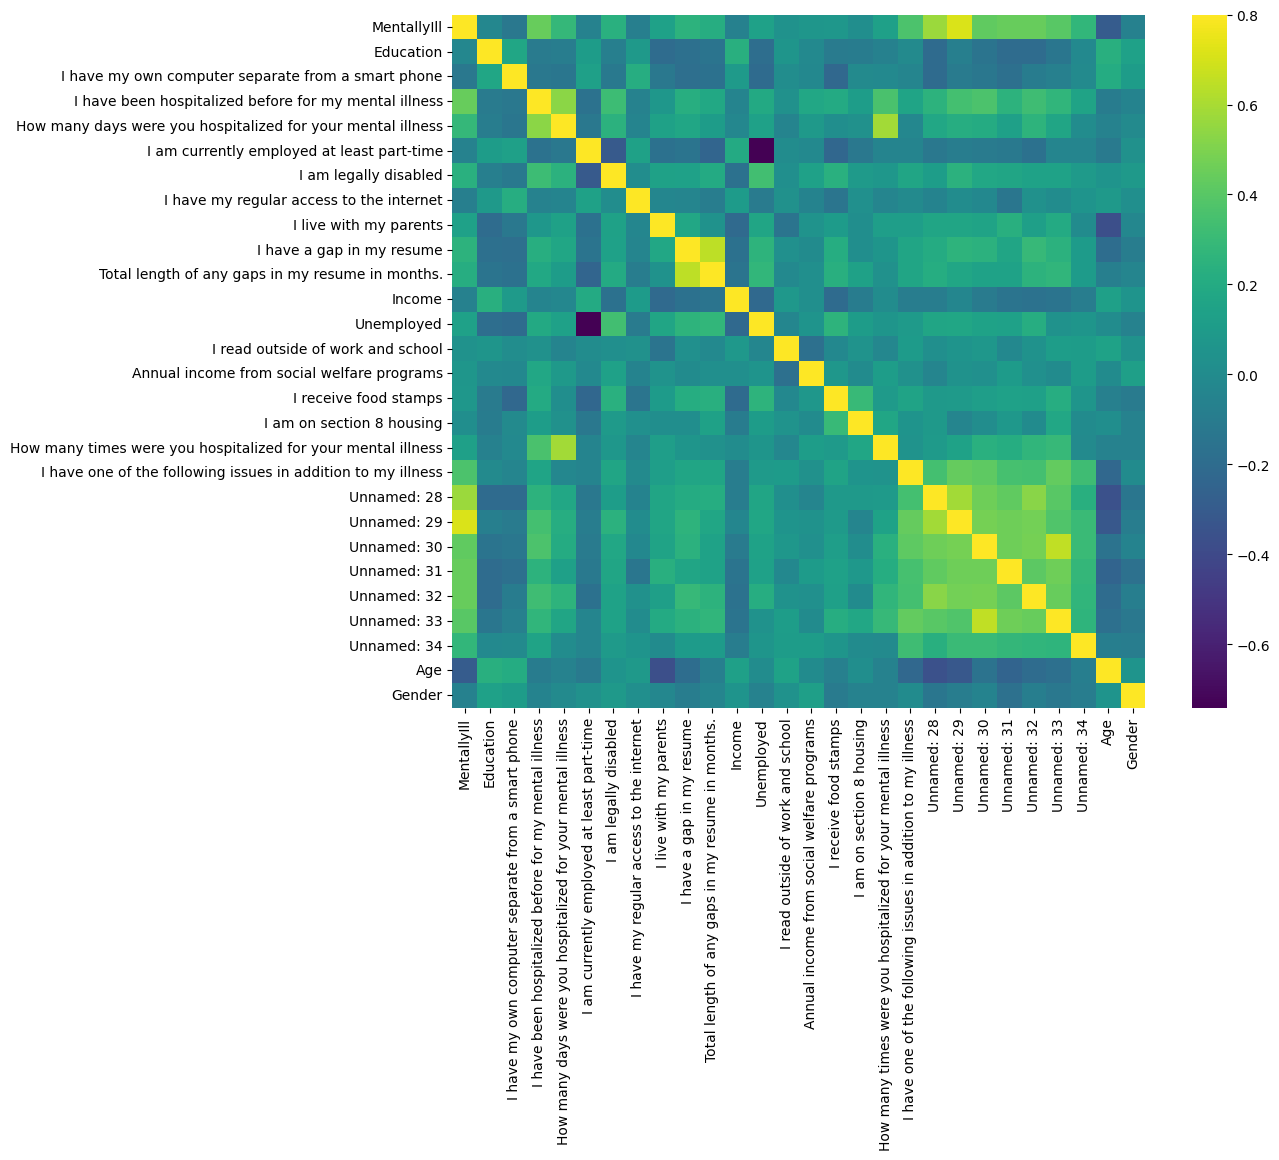

In [60]:
corrmat = df_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
color_palette = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corrmat, vmax=.8, square=True, cmap=color_palette);
plt.show()

Using Random Forest with obvious indicators of mental health

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create copies of the DataFrame for further processing
df_3 = df_2.copy()
df_4 = df_2.copy()
df_5 = df_2.copy()

# Set the target variable and create a copy of the DataFrame without the target
y = df_2['MentallyIll']
df_2.drop(['MentallyIll'], axis=1, inplace=True)

In [62]:
# Prepare the input features
X = df_2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier with specified parameters
random_forest = RandomForestClassifier(max_depth=10, random_state=0)

# Train the RandomForestClassifier on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

<Axes: xlabel='feature'>

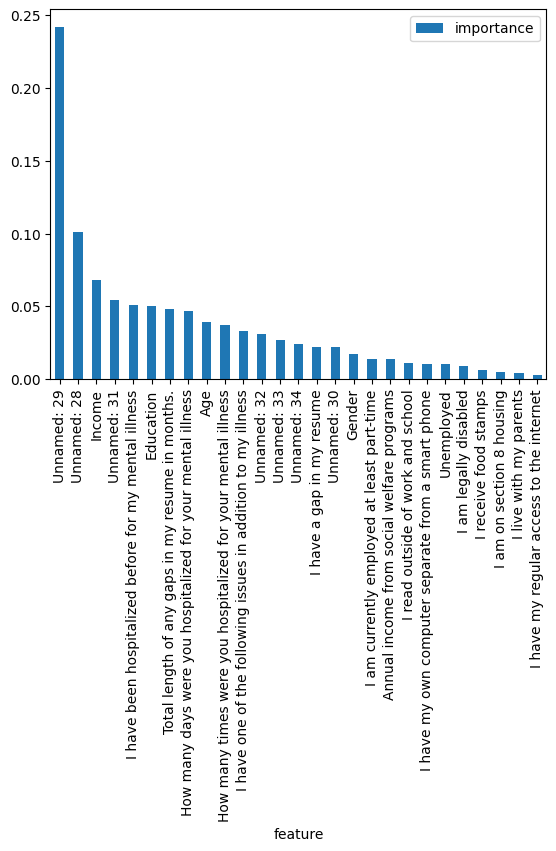

In [63]:
# Calculate feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.round(random_forest.feature_importances_, 3)
})

# Sort features by importance
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Create a bar plot of feature importances
importances.plot(kind='bar')

In [64]:
print(random_forest.score(X_test,y_test))

0.9402985074626866


In [65]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validated predictions
predictions = cross_val_predict(random_forest, X_train, y_train, cv=5)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_train, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[185  17]
 [ 24  41]]


The model has a relatively high number of true positives (41) and true negatives (185), indicating that it is capable of correctly identifying both positive and negative cases.

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
print("F1 score:",f1_score(y_train, predictions))

Precision: 0.7068965517241379
Recall: 0.6307692307692307
F1 score: 0.6666666666666666


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


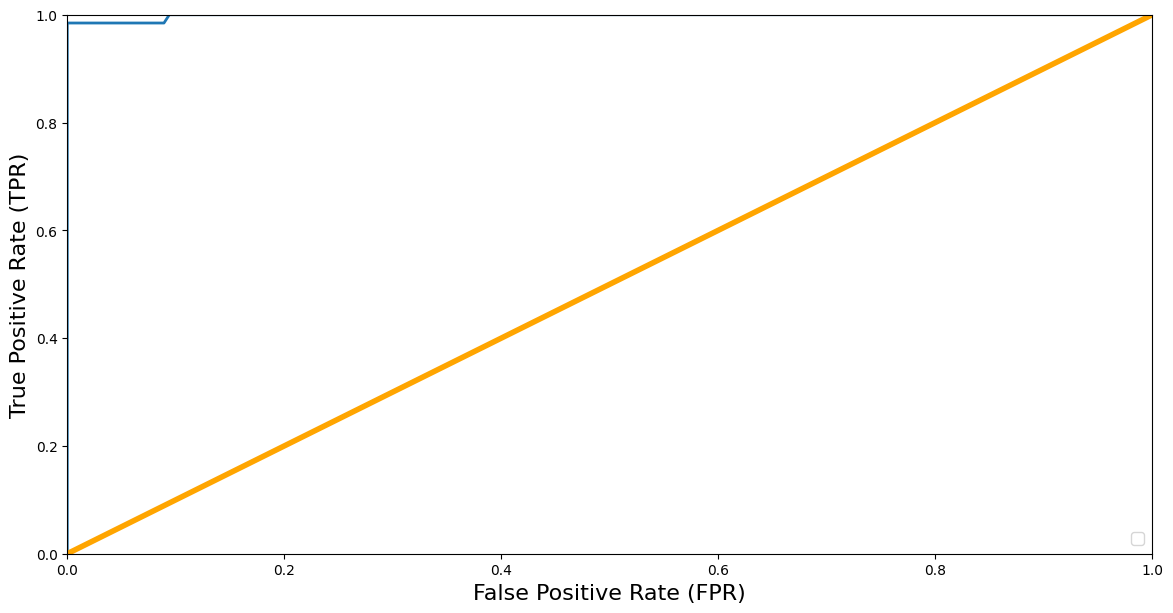

In [67]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve values
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

# Create a figure for ROC AUC curve
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [68]:
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

In [69]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9985910129474486


RANDOM FOREST second instance; Removing Clear Mental Health Conditions ???!! Not working

In [70]:
# df_3.drop(['I have been hospitalized before for my mental illness'],axis=1,inplace=True)
# df_3.drop(['How many days were you hospitalized for your mental illness'],axis=1,inplace=True)
# df_3.drop(['I am legally disabled'],axis=1,inplace=True)
# df_3.drop(['How many times were you hospitalized for your mental illness'],axis=1,inplace=True)
# # df_3.drop([' depression'],axis=1,inplace=True)
# df_3.drop([' anxiety'],axis=1,inplace=True)
# df_3.drop([' Obsessive'],axis=0,inplace=True)
# df_3.drop([' panic attack'],axis=1,inplace=True)
# df_3.drop([' mood swings'],axis=1,inplace=True)
# df_3.drop([' compulsive'],axis=1,inplace=True)

Modifying Task, Random Forest to Predict Unemployment Based on Mental Illness and Symptoms

In [71]:
#Drop income and current employment features
df_4.drop(['Income'],axis=1,inplace=True)
df_4.drop(['I am currently employed at least part-time'],axis=1,inplace=True)
df_4.drop(['Annual income from social welfare programs'],axis=1,inplace=True)
df_4.drop(['I receive food stamps'],axis=1,inplace=True)
y = df_4['Unemployed']
df_4.drop(['Unemployed'],axis=1,inplace=True)

In [72]:
# Prepare the input features
X = df_4

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a RandomForestClassifier with specified parameters
random_forest2 = RandomForestClassifier(max_depth=10, random_state=0)

# Train the RandomForestClassifier on the training data
random_forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

<Axes: xlabel='feature'>

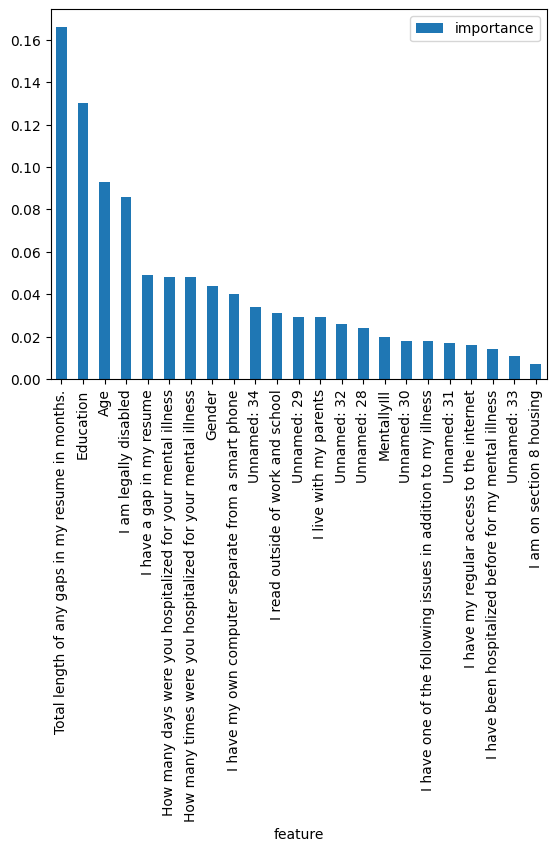

In [73]:
# Calculate feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.round(random_forest2.feature_importances_, 3)
})

# Sort features by importance
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Create a bar plot of feature importances
importances.plot(kind='bar')

In [74]:
print(random_forest2.score(X_test,y_test))

0.8208955223880597


In [75]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validated predictions
predictions = cross_val_predict(random_forest2, X_train, y_train, cv=5)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_train, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[175  16]
 [ 54  22]]


The model has a relatively high number of true positives (22) and true negatives (175), indicating that it is capable of correctly identifying both positive and negative cases.

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))
print("F1 score:",f1_score(y_train, predictions))

Precision: 0.5789473684210527
Recall: 0.2894736842105263
F1 score: 0.3859649122807018


In [77]:
# getting the probabilities of our predictions
y_scores = random_forest2.predict_proba(X_train)
y_scores = y_scores[:,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


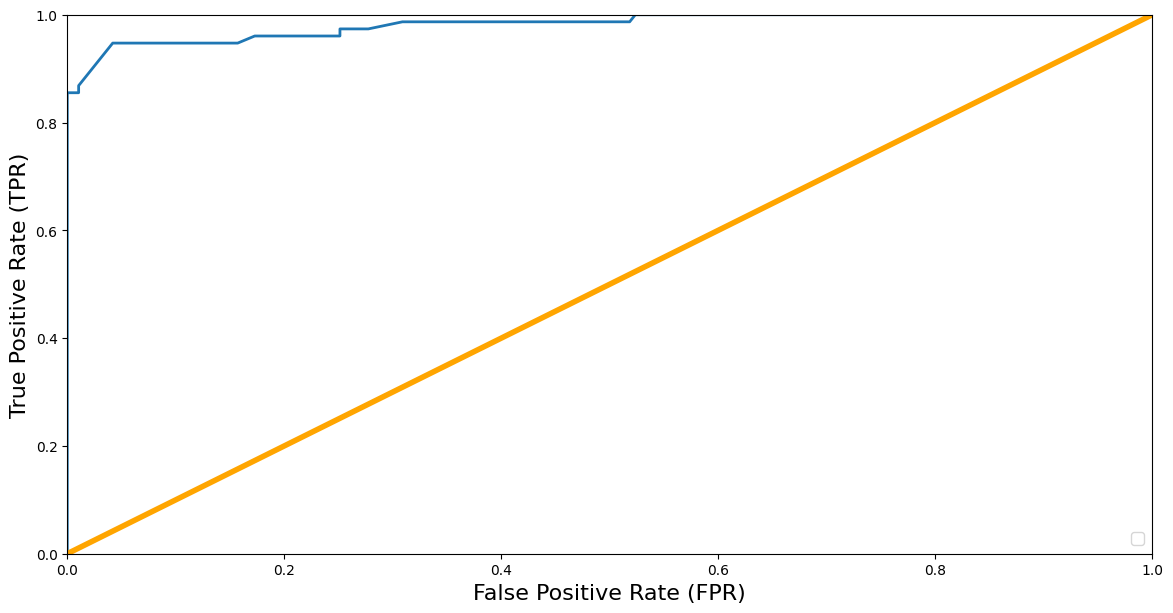

In [78]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve values
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# Define a function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

# Create a figure for ROC AUC curve
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.legend(loc='lower right', fontsize=12)
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9816065031689171


Plots the Accuracy and AUC ROC

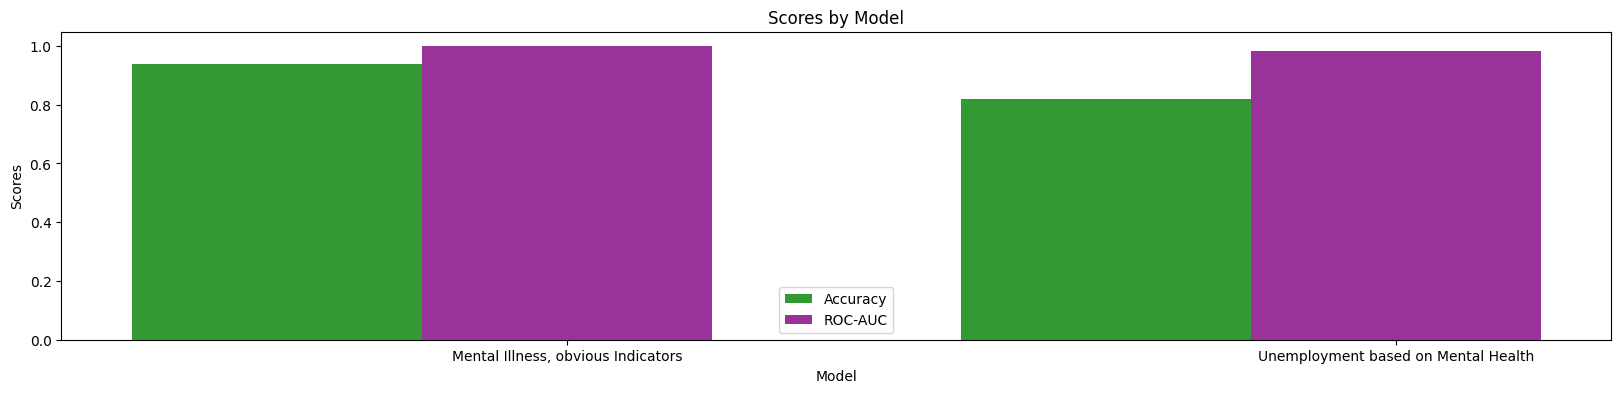

<Figure size 3000x700 with 0 Axes>

In [92]:
# data to plot
n_groups = 2
accuracy = (0.9402985074626866, 0.8208955223880597)
auc_roc = (0.9985910129474486, 0.9816065031689171)
 
# create plot
a4_dims = (20, 4)
fig, ax = plt.subplots(figsize=a4_dims)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, accuracy, bar_width,
alpha=opacity,
color='g',
label='Accuracy')
 
rects2 = plt.bar(index + bar_width, auc_roc, bar_width,
alpha=opacity,
color='purple',
label='ROC-AUC')
 
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width, ('Mental Illness, obvious Indicators', 
                               'Unemployment based on Mental Health'))
plt.legend()
plt.figure(figsize=(30, 7))
plt.show()